# Taller 7

-Natali André Julio Beltrán - 1098807231\
-Brayan Alejandro Murillo González - 1007338060

In [1]:
import sympy as sp 
import numpy as np
import scipy as sc
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import pandas as pd
from sympy import Symbol
from scipy import misc

# Lucy's quartics kernerl

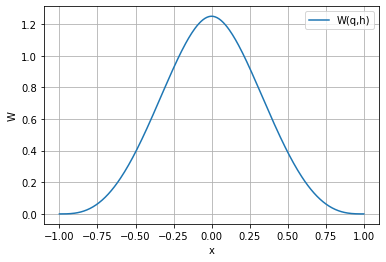

In [2]:

lucy_eq = lambda q: (1+3*q)*(1-q)**3  # Funcion numpy del kernel de lucy

"""
Parametros para la función
"""
a = 0
h = 1
x = np.linspace(a-1 , a+1 , 300)
alpha = 5/(4*h)   

def lucy_f(x,h,a):
  x = np.linspace(a-1,a+1,300) # Arreglo de posiciones en x
  alpha = 5/(4*h)              # Constante dimensional
  q = abs(x-a)/h               # Valores de q 
  w = np.zeros(len(q))         # Arreglo para almacenar los valores de la funcion

  """ Ciclo para filtrar los valores de la función dadas las condiciones de q """
  for i in range(0,len(q)):
    if q[i]<=1 and q[i]>0:
      w[i] = alpha*(1+3*q[i])*(1-q[i])**3
    else :
      w[i] = 0
  return (w)

""" Grafica del kernel de lucy en 1-D """  
plt.plot(x,lucy_f(x,h,a),label="W(q,h)")
plt.xlabel("x")
plt.ylabel("W")
plt.legend()
plt.grid()


In [3]:
""" Derivada simbólica del kernel de lucy """
q = Symbol('q')
lucyds = sp.diff(lucy_eq(q),q) # Funcion en formato scipy
lucydn = sp.lambdify(q,alpha*lucyds, 'numpy') # Funcion convertida a numpy
h=Symbol("h")
alpha= 5/(4*h)
alpha*(lucyds)

5*(3*(1 - q)**3 - 3*(1 - q)**2*(3*q + 1))/(4*h)

In [4]:
h=1
""" Funcion de la derivada del kernel de lucy"""
def lucy_der(x,h,a):
  alpha = 5/(4*h)
  q = abs(x-a)/h
  w = np.zeros(len(q))

  for i in range(0,len(q)):
    if q[i] <= 1 and q[i] > 0:
      w[i] = alpha * lucydn(q[i])
    if x[i] < 0:
      w[i] = -alpha*lucydn(q[i])
    if q[i] > 1:
      w[i] = 0

  return (w)



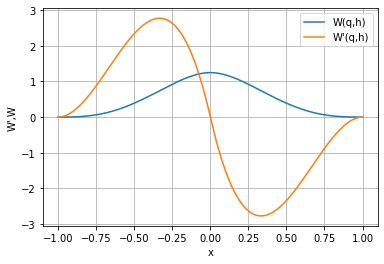

In [5]:
""" Grafica del kernel de lucy en 1-D y su primera derivada"""  
plt.plot(x,lucy_f(x,h,a),label="W(q,h)")
plt.plot(x,lucy_der(x,h,a),label="W'(q,h)")
plt.xlabel("x")
plt.ylabel("W',W")
plt.legend()
plt.grid()

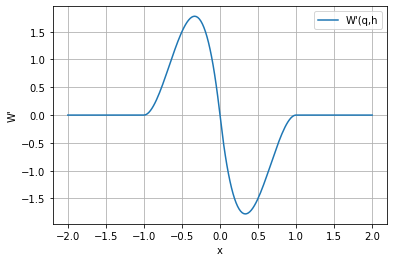

In [6]:
""" Derivada numérica del kernel de lucy """

a = 0
h = 1
x = np.linspace(-2,2,200)
q = abs(x-a)/h
alpha = 5/(4*h)

""" Funcion de la derivada del kernel de lucy(numérica)"""
def lucy_dern(x,h,a):
  alpha = 5/(4*h)
  q = abs(x-a)/h
  w = np.zeros(len(q))

  for i in range(0,len(q)):
    if q[i] <= 1 and q[i] > 0:
      w[i] = misc.derivative(lucy_eq,q[i],dx = 0.0001)
    if x[i] < 0:
      w[i] = -misc.derivative(lucy_eq,q[i],dx = 0.0001)
    if q[i] > 1:
      w[i] = 0

  return (w)
plt.plot(x,lucy_dern(x,1,0),label="W'(q,h")
plt.xlabel("x")
plt.ylabel("W'")
plt.legend()
plt.grid()


## Método del trapecio 

Se quiere aproximar la integral $\int_{x_0}^{x_1}f(x)dx$ numéricamente en un intervalo cerrado $[x_0,x_1]$para ello definimos el polinomio de lagrange $P_{1}(x)$ dado por:
\begin{equation}
P_{1}(x)= \frac{x-x_{1}}{x_{0}-x_{1}}f(x_{0})+\frac{x-x_{0}}{x_{1}-x_{0}}f(x_{1})
\end{equation}

Sea $h=x_1-x_0$
\
Luego se tiene que: $$P_1(x)\approx f(x) $$

Reemplazando en la integral se tiene:

\begin{equation}\tag{2}
\int_{x_0}^{x_1}f(x)dx=\int_{x_0}^{x_1}\left[\frac{x-x_{1}}{x_{0}-x_{1}}f(x_{0})+\frac{x-x_{0}}{x_{1}-x_{0}}f(x_{1})\right]dx+\frac{1}{(n+1)!}\
\int_{x_0}^{x_1}\prod_{i=0}^{n}(x-x_i)f^{(n+1)}(\xi(x))dx
\end{equation}

Donde $n$ corresponde al orden del polinomio de lagrange el cual es $n=1$\
Reemplazando se obtiene:

\begin{equation}
\int_{x_0}^{x_1}f(x)dx=\int_{x_0}^{x_1}\left[\frac{x-x_1}{x_0-x_{1}}f(x_0)+\frac{x-x_0}{x_1-x_0}f(x_{1})\right] dx+\frac{1}{2}\
\int_{x_0}^{x_1}(x-x_0)(x-x_1)f^{''}(\xi(x))dx
\end{equation}
\
El producto $(x-x_0)(x-x_1)$ no cambia de signo en el intervalo  $[x_0,x_1]$ por lo que el teorema del valor medio ponderado para integrales se puede aplicar al termino del error para obtener valores de $\xi(x)$ para los valores $(x_0,x_1)$ de esto se obtiene que:

\begin{equation}
\int_{x_0}^{x_1}(x-x_0)(x-x_1) f^{''}(\xi(x)) dx
=f^{''}(\xi(x)\int_{x_0}^{x_1}(x-x_0)(x-x_1)dx
\end{equation}

$$
=f^{''}(\xi)\sideset{}{_{x_0}^{x_1}}{\left[\frac{x^3}{3}-\frac{x_1+x_0}{2}x^2+x_0x_1x\right]}
$$
\
$$=-\frac{h^3}{6}f^{''}(\xi)$$


Ahora remplazando este resultado en $(2)$ y desarrollando se tiene:
\begin{equation}
\int_{x_0}^{x_1}f(x)dx=\sideset{}{_{x_0}^{x_1}}{\left[\frac{(x-x_1)^2}{2(x_0-x_1)}f(x_{0})+\frac{(x-x_0)^2}{2(x_1-x_0)}f(x_1)\right]}dx-\frac{h^3}{12}f^{''}(\xi)
\end{equation}

\
\begin{equation}
=\frac{(x_1-x_0)}{2}\left[f(x_0)+f(x_1)\right]-\frac{h^3}{12}f^{''}(\xi)
\end{equation}
\
Luego como $h=x_1-x_0$
se tiene la siguiente regla:
\
\begin{equation}
\int_{x_0}^{x_1}f(x)dx=\frac{h}{2}\left[f(x_0)+f(x_1)\right]-\frac{h^3}{12}f^{''}(\xi)
\end{equation}

Esto recibe el nombre de regla trapezoidal porque cuando f es una función con valores
positivos $\int_{x_0}^{x_1}f(x)dx$ se aproxima mediante el área de un trapecio.
El término de error para la regla trapezoidal implica $f^"$, por lo que la regla da el resultado
exacto cuando se aplica a cualquier función cuya segunda derivada es idénticamente cero, es
decir, cualquier polinomio de grado uno o menos.




# Regla de Simpson



La regla de Simpson resulta de la integración sobre $[a, b]$ del segundo polinomio de
Lagrange con nodos igualmente espaciados $x_0 = a, x_2 = b$, y $x_1 = a + h$, en donde
$h = (b − a)/2$. 
Por lo tanto:


\begin{equation} \tag{1}
\int_{x_0}^{x_2}f(x)dx
=\int_{x_0}^{x_2}\left[\frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)}f(x_0)+\frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)}f(x_{1})+\frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)}f(x_2)\right] dx\\
+\int_{x_0}^{x_2}\frac{(x-x_0)(x-x_1)(x-x_2)}{6}f^{(3)}(\xi(x))
\end{equation}



Al deducir la regla de Simpson de esta forma, sin embargo, da un solo término de error $O(h4)$
relacionado con $f^{(3)}$. Al aproximar el problema de otra forma, se puede derivar otro término
de orden superior relacionado con $f^{(4)}$.
Para ilustrar este método alternativo, suponga que $f$ se expande en el tercer polinomio de
Taylor alrededor de $x_1$. Entonces, para cada $x$ en $[x_0, x_2]$, existe un número $\xi(x)$ en $[x_0, x_2]$ con:


\begin{equation}
f(x)=f(x_1)+f^{'}(x_1)(x-x_1)+\frac{f^{"}(x_1)}{2}(x-x_1)^2+\frac{f^{'''}(x_1)}{6}(x-x_1)^3+\frac{f^{(4)}(\xi(x))}{24}(x-x_1)^4
\end{equation}

y la integral:


\begin{equation}\tag{2}
\int_{x_0}^{x_2}f(x)dx = \sideset{}{_{x_0}^{x_2}}{\left[f(x_1)+f^{'}(x_1)(x-x_1)+\frac{f^{"}(x_1)}{2}(x-x_1)^2+\frac{f^{'''}(x_1)}{6}(x-x_1)^3+\frac{f^{(4)}(\xi(x))}{24}(x-x_1)^4\right]}\\
+\frac{1}{24}\int_{x_0}^{x_2}f^{(4)}(\xi(x))(x-x_1)^4dx
\end{equation}\\

Puesto que $(x-x_1)^4$ nunca es negativo en $[x_0, x_2]$, el teorema de valor promedio ponderado
para las integrales implica que:

\begin{equation}
\frac{1}{24}\int_{x_0}^{x_2}f^{(4)}(\xi(x))(x-x_1)^4 dx
=\frac{f^{(4)}(\xi_1)}{24}\int_{x_0}^{x_2}(x-x_1)^4 dx
=\frac{f^{(4)}(\xi_1)}{120}\sideset{}{_{x_0}^{x_1}}{\left[(x-x_1)^{5}\right]}
\end{equation}


Para algún número $\xi_1$ en $(x_1,x_2)$\
Sin embargo, $h=x_2-x_1=x_1-x_0$ , por lo que:

$$(x_2-x_1)^2-(x_0-x_1)^2=(x_2-x_1)^4-(x_0-x_1)^4=0$$

mientras
$$(x_2-x_1)^3-(x_0-x_1)^3=2h^3$$
$$(x_2-x_1)^5-(x_0-x_1)^5=2h^5$$

Por consiguiente la ecuación $(2)$ se puede reescribir como:
\begin{equation}\tag{3}
\int_{x_0}^{x_2}f(x)dx=2hf(x_1)+\frac{h^3}{3}f^{''}(x_1)+\frac{f^{(4)}(\xi_1)}{60}h^5
\end{equation}


Ahora si reemplazamos $f^{''}(x_1)$ por medio de la aproximación:
\begin{equation}
f^{''}(x_1)=\left[\frac{1}{h^2}(f(x_0)-2f(x_1)+f(x_2))-\frac{h^2}{12}f^{(4)}(\xi_2)\right]
\end{equation}
 
La ecuacion $(3)$ queda:
\begin{equation}
\int_{x_0}^{x_2}f(x)dx=2hf(x_1)+\frac{h^3}{3}\left[\frac{1}{h^2}(f(x_0)-2f(x_1)+f(x_2))-\frac{h^2}{12}f^{(4)}(\xi_2)\right]+\frac{f^{(4)}(\xi_1)}{60}h^5
\end{equation}

\begin{equation}
=\frac{h}{3}\left[f(x_0)+4f(x_1)+f(x_2)\right]-\frac{h^5}{12}\left[\frac{1}{3}f^{(4)}(\xi_2)-\frac{1}{5}f^{(4)}(\xi_1)\right]
\end{equation}

Con métodos alternos se puede mostrar (consulte el ejercicio 26) que los valores $\xi_1$ y $\xi_2$ en
esta expresión se pueden reemplazar mediante un valor común $\xi$ en $(x0, x2)$. Esto da la regla
de Simpson:

\begin{equation}
\int_{x_0}^{x_2}f(x)dx=\frac{h}{3}\left[f(x_0)+4f(x_1)+f(x_2)\right]-\frac{h^5}{90}f^{(4)}(\xi)
\end{equation}

El término de error en la regla de Simpson implica la cuarta derivada de $f(x)$, por lo que da
resultados exactos cuando se aplica a cualquier polinomio de grado tres o menos.


# Cuadratura Gaussiana


\begin{equation}
\int_{a}^{b}f(x)dx=\int_{-1}^{1}f\left(\frac{(b-a)t+(b+a)}{2}\right)\frac{b-a}{2}
\end{equation}

In [7]:
import sympy as sp 
import numpy as np
import matplotlib.pylab as plt
from sympy import init_printing
from sympy import solve,Eq
import scipy as sc
from scipy import optimize 
import scipy.integrate as integrate
import math as m


# Función para el metodo del trapecio

In [8]:
def integr_trap(f_s,f,a,b,epsilon):

  """
  f_s : función de scipy
  f : funcion numpy
  a : limite inferior de la integral
  b : limite superior de la integral
  epsilon : Precisión del cálculo
  
  """

  x = sp.symbols("x")

  f2 = sp.diff(f_s(x), x, 2) #Segunda derivada de la función 


  fxn5 = sp.lambdify(x, -f2, 'numpy')  # se convierte la funcion de scipy a numpy
   
  fp = sc.optimize.fminbound(fxn5,a,b) # Maximo de la segunda derivada de la función en el rango [a,b]

  Max = abs(-fxn5(fp))    #Valor del maximo de la segunda derivada de la función

  h = np.sqrt((12*epsilon)/(Max*(b-a))) # Valor del h

  N = int((b-a)/h)+1         # Numero de intervalos

  x = np.linspace(a, b, N+1) # Valores de x para evaluar la integral

  x_interior = x[1:-1]  #Puntos del interior

  """Formula del trapecio"""
  
  T1 =  (f(a))

  T3 =  (f(b))

  T2 =  sum(f(x_interior))

  trap_f = T1 + 2*T2 + T3

  trap_f = 0.5*h*trap_f

  return  (trap_f)

# Función para el método de Simpson

In [9]:
def simpson(f_s,f, a, b, epsilon):
  """
  Aproxima la integral de $f$ en $[a,b]$ mediante la fórmula compuesta 
  de Simpson con N subintervalos
  """
  x = sp.symbols("x")

  f2 = sp.diff(f_s(x), x, 2) #Segunda derivada de la función 


  fxn5 = sp.lambdify(x, -f2, 'numpy')  # se convierte la funcion de scipy a numpy
   
  fp = sc.optimize.fminbound(fxn5,a,b) # Maximo de la segunda derivada de la función en el rango [a,b]

  M = abs(-fxn5(fp))  #Valor del maximo de la segunda derivada de la función

  N = int(((b-a)**5*M/(epsilon*180*2**4))**(1./4))+1 # Numero de intervalos
  
  n_nodos = 2*N+1 # (N+1 extremos de subintervalos) + (N puntos medios)
  
  x = np.linspace(a, b, n_nodos)

  x_impar = x[1: :2] # Nodos con coordenada impar (ptos medios)

  x_par = x[2:n_nodos-1:2] # Nodos con coordenada par (salvo el primero y el último)

  h = (b-a)/(2*N) # Distancia entre dos nodos de integración

  cuad = h/3*(f(a) + 2*sum(f(x_par)) + 4*sum(f(x_impar)) + f(b)) # F. comp. de Simpson

  return cuad  

#**Integración**

$$ \int_{0}^{1}e^{1-x^2}dx$$

In [10]:

f1_s=lambda x: sp.exp(1-x**2) # Funcion en formato de scipy
f1=lambda x: np.exp(1-x**2)   # Funcion en formato de numpy
a=0 # Limite inferior de la integral
b=1 # Limite superior de la integral
eps=1*10**-5  # epsilon de la exactitud 


""" Valores de las integrales con los distintos métodos"""
valor={"Trapezoide":"%5lf" %(integr_trap(f1_s,f1,a,b,eps)),'Simpson':"%5lf" %(simpson(f1_s,f1,a,b,eps)),"Cuadratura":"%5lf" %(integrate.quad(f1,a,b,epsabs=1e-05)[0])}
valor

{'Cuadratura': '2.030078', 'Simpson': '2.030095', 'Trapezoide': '2.044242'}

$$\int_{-\infty}^{\infty}\frac{1}{1+x^2}dx$$

In [11]:
f2= lambda x: 1/(1+x**2) # Funcion en formato de numpy
a=np.NINF # Simbolo de menos infinito en numpy
b=np.inf  # Simbolo de infinito en numpy

valor=integrate.quad(f2,a,b,full_output=0, epsabs=1e-05)[0]
print("%5lf" %(valor))

3.141593


 La integral $$\int_{0}^{\frac{\pi}{4}}\int_{sin(x)}^{cos(x)}\left[2ysin(x)+cos^{2}(x)\right]dydx$$
 Puede reescribirse como:

 $$ \int_{0}^{\frac{\pi}{4}}\left[\int_{sin(x)}^{cos(x)}2ysin(x)dy+\int_{sin(x)}^{cos(x)}cos^2(x)dy\right]dx $$

 Se separan las dos integrales dentro de las llaves y se resuelven por aparte, la primer integral sería:
 $$\int_{sin(x)}^{cos(x)}2ysin(x)dy$$\
 $$=sin(x)\int_{sin(x)}^{cos(x)}2ydy$$\
 $$=sin(x)\sideset{}{_{sin(x)}^{cos(x)}}{\left[y^2\right]}$$\
 $$=sin(x)(cos^{2}(x)-sin^{2}(x))$$\

Ahora la segunda integral:
$$\int_{sin(x)}^{cos(x)}cos^2(x)dy$$\
$$=cos^2(x)\int_{sin(x)}^{cos(x)}dy$$\
$$=cos^2(x)\sideset{}{_{sin(x)}^{cos(x)}}{\left[y\right]}$$\
$$=cos^2(x)(cos(x)-sin(x))$$

Finalmente nos queda la integral:
$$\int_{0}^{\frac{\pi}{4}}\left[sin(x)(cos^{2}(x)-sin^{2}(x))+cos^2(x)(cos(x)-sin(x))\right]dx$$


In [12]:

f3_s=lambda x: (sp.sin(x)*((sp.cos(x))**2-(sp.sin(x))**2))+(sp.cos(x)**2*(sp.cos(x)-sp.sin(x))) # Funcion en formato de scipy
f3=lambda x: (np.sin(x)*((np.cos(x))**2-(np.sin(x))**2))+(np.cos(x)**2*(np.cos(x)-np.sin(x)))   # Funcion en formato de numpy
epsilon=1e-5
a=0
b=np.pi*0.25
valor={"Trapezoide":"%5lf" %(integr_trap(f3_s,f3,a,b,eps)),'Simpson':"%5lf" %(simpson(f3_s,f3,a,b,eps)),"Cuadratura":"%5lf" %(integrate.quad(f3,a,b,epsabs=1e-05)[0])}
valor

{'Cuadratura': '0.511845', 'Simpson': '0.514456', 'Trapezoide': '0.922684'}

$$\int_{e}^{2e}\frac{1}{ln(x)}dx$$

In [13]:
f4_s=lambda x: 1/sp.log(x) # Funcion en formato de scipy
f4=lambda x: 1/np.log(x)   # Funcion en formato de numpy
a=np.e   # Limite inferior de la integral
b=2*np.e # Limite superior de la integral
eps=1e-5

valor={"Trapezoide":"%5lf" %(integr_trap(f4_s,f4,a,b,eps)),'Simpson':"%5lf" %(simpson(f4_s,f4,a,b,eps)),"Cuadratura":"%5lf" %(integrate.quad(f4,a,b,epsabs=1e-05)[0])}
valor


{'Cuadratura': '2.003811', 'Simpson': '2.003816', 'Trapezoide': '2.006240'}

# Velocidad de escape


se tiene la ecuación: $$v^2=2gR\int_{1}^{\infty}\frac{1}{z^2}dz$$
extraemos la integral: $$\int_{1}^{\infty}\frac{1}{z^2}dz$$
Se soluciona con la funcion integrate.quad:


In [14]:
f=lambda z: 1/(z**2) # funcion que está dentro de la integral
a=1      # Limite inferior
b=np.inf # Limite superior que es infinito

valor=integrate.quad(f,a,b,full_output=0, epsabs=1e-05)[0]  # Valor de la integral en función de Z
valor



1.0

La integral $$\int_{1}^{\infty}\frac{1}{z^2}dz=1$$
para $z=\frac{x}{R}$\
Por tanto la expresión de la velocidad de escape es:
$$ v=\sqrt{2gR}$$

In [15]:
g=9.8
R=6370000
print("La velocidad de escape es de: %5lf [m/s]"  %(np.sqrt(2*g*R)))


La velocidad de escape es de: 11173.719166 [m/s]


#PUNTO 6

In [16]:
def integr_trap(f_s,f,a,b,epsilon,N):

  """
  f_s : función de scipy
  f : funcion numpy
  a : limite inferior de la integral
  b : limite superior de la integral
  epsilon : Precisión del cálculo
  
  """

  x = sp.symbols("x")

  f2 = sp.diff(f_s(x), x, 2) #Segunda derivada de la función 


  fxn5 = sp.lambdify(x, -f2, 'numpy')  # se convierte la funcion de scipy a numpy
   
  fp = sc.optimize.fminbound(fxn5,a,b) # Maximo de la segunda derivada de la función en el rango [a,b]

  Max = abs(-fxn5(fp))    #Valor del maximo de la segunda derivada de la función

  h = np.sqrt((12*epsilon)/(Max*(b-a))) # Valor del h

  x = np.linspace(a, b, N+1) # Valores de x para evaluar la integral

  x_interior = x[1:-1]  #Puntos del interior

  """Formula del trapecio"""
  
  T1 =  (f(a))

  T3 =  (f(b))

  T2 =  sum(f(x_interior))

  trap_f = T1 + 2*T2 + T3

  trap_f = 0.5*h*trap_f

  return  (trap_f)

In [17]:
def simpson(f_s,f, a, b, epsilon,N):
  """
  Aproxima la integral de $f$ en $[a,b]$ mediante la fórmula compuesta 
  de Simpson con N subintervalos
  """
  x = sp.symbols("x")

  f2 = sp.diff(f_s(x), x, 2) #Segunda derivada de la función 


  fxn5 = sp.lambdify(x, -f2, 'numpy')  # se convierte la funcion de scipy a numpy
   
  fp = sc.optimize.fminbound(fxn5,a,b) # Maximo de la segunda derivada de la función en el rango [a,b]

  M = abs(-fxn5(fp))  #Valor del maximo de la segunda derivada de la función
  
  n_nodos = 2*N+1 # (N+1 extremos de subintervalos) + (N puntos medios)
  
  x = np.linspace(a, b, n_nodos)

  x_impar = x[1: :2] # Nodos con coordenada impar (ptos medios)

  x_par = x[2:n_nodos-1:2] # Nodos con coordenada par (salvo el primero y el último)

  h = (b-a)/(2*N) # Distancia entre dos nodos de integración

  cuad = h/3*(f(a) + 2*sum(f(x_par)) + 4*sum(f(x_impar)) + f(b)) # F. comp. de Simpson

  return cuad  

In [18]:

f_s = lambda t: sp.exp(-t)  # Funcion en formato sympy
f = lambda t: np.exp(-t)    # Funcion en formato numpy

a = 0   # Limites de integración
b = 1

eps = 1e-7  # Epsilon de la exactitud
  
N = [2,10,20,40,80,160]   # Valores de N (Numero de particiones)

trap = np.zeros(len(N)) # arreglo para almacenar los valores de la integral con el método del trapecio
er_trap = []        # Lista para almacenar el error del valor de la integral con el metodo del trapecio

simp = np.zeros(len(N))  # arreglo para almacenar los valores de la integral con el método del trapecio
er_simp = []      # Lista para almacenar el error del valor de la integral con el metodo de simpson


# Ciclo para evaluar la integral con cada metodo y almacenar los valores en los respectivos arrays anteriores
for i in range(0,len(N)):
  numer = integrate.quad(f,a,b)[0]
  trap[i] = integr_trap(f_s,f,a,b,eps,N[i])
  simp[i] = simpson(f_s,f,a,b,eps,N[i])


# Ciclo para calcular el error de cada metodo y almacenar los valores en los respectivos arrays :
  er_trap.append(abs(trap[i]-numer)/numer)
  er_simp.append(abs(simp[i]-numer)/numer)

" Dataframe para organizar los valores de N y los errores"
df=pd.DataFrame()
df["N"]=N
df["e_trapecio"]=er_trap
df["e_simpson"]=er_simp
df

,N,e_trapecio,e_simpson
0,2,0.997764,2.154097e-05
1,10,0.989036,3.471189e-08
2,20,0.978086,2.169977e-09
3,40,0.956180,1.356309e-10
4,80,0.912363,8.476657e-12
5,160,0.824728,5.300655e-13


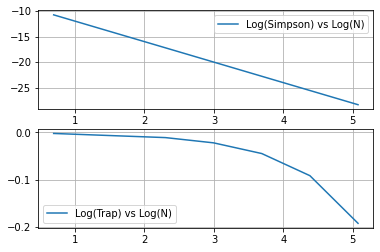

In [19]:
loge_simp = np.log(er_simp) # Log del error abosoluto de simpson
loge_trap = np.log(er_trap) # Log del error absoluto
Nlog = np.log(N)            # Log de N


fig, axes = plt.subplots(2, 1) 
axes[0].plot(Nlog, loge_simp, label="Log(Simpson) vs Log(N)") # Grafica log-log del error con el metodo de simpson vs N
axes[1].plot(Nlog, loge_trap, label="Log(Trap) vs Log(N)")# Grafica log-log del error con el metodo de trapecio vs N
axes[1].legend()
axes[0].legend()
axes[0].grid()
axes[1].grid()